# Longitudinal Analysis of Oral Health-Related Quality of Life Using OHIP-14


## Project Overview

This project analyzes changes in oral health-related quality of life (OHRQoL) in a small cohort of postoperative patients using the OHIP-14 survey, collected at four timepoints: pre-op, 3 month post-op, 6 month post-op, and 1 year post-op.

I assess whether surgery leads to statistically and clinically meaningful improvements across pain, psychological, and functional domains using Wilcoxon signed-rank test and visualizations.

> This project demonstrates how patient-reported outcomes (PROs) can be analyzed and visualized in a longitudinal clinical setting.


## Introduction

Orthognathic surgery is a corrective procedure for skeletal and dental deformities that affect jaw alignment, facial symmetry, and oral function. While the clinical outcomes are well-documented, understanding the impact of surgery on patients' oral health–related quality of life (OHRQoL) is equally important.

The Oral Health Impact Profile (OHIP-14) is a validated, patient-reported outcome measure designed to capture the social and psychological impact of oral health conditions. It is widely used to assess OHRQoL across seven dimensions, including functional limitation, physical pain, and social disability.

## OHIP-14 Survey Overview

The OHIP-14 is a standardized, patient-reported survey measuring oral health-related quality of life across seven domains:

- Functional Limitation  
- Physical Pain  
- Psychological Discomfort  
- Physical Disability  
- Psychological Disability  
- Social Disability  
- Handicap  

Each domain (consisting of two questions) is scored on a scale of 0 to 8, with higher scores indicating worse quality of life.

In this project, I examine how these scores change over time following oral surgery, using paired statistical tests and exploratory data visualization.

## Objectives

This analysis aims to evaluate changes in OHRQoL following orthognathic surgery using OHIP-14 responses collected at multiple time points. Specifically, we aim to:

- Assess whether OHIP-14 total scores significantly improve from baseline (preoperative) to postoperative follow-ups.
- Compare OHIP-14 scores at 3, 6, and 12 months postoperatively.
- Support future study design with evidence-backed recommendations

## Data Description

The dataset consists of OHIP-14 questionnaire responses from patients undergoing orthognathic surgery, collected at up to four time points:
- **Baseline (pre-surgery)**
- **3 months post-op (POM3)**
- **6 months post-op (POM6)**
- **12 months post-op (POY1)**

Each item is scored on a 5-point Likert scale (0 = "Never" to 4 = "Very often"), with higher scores indicating poorer perceived oral health. Additional variables include demographic and clinical data where available.

Data analysis was conducted using Python (pandas, seaborn, matplotlib), with appropriate statistical testing (e.g., repeated measures ANOVA or non-parametric equivalents) to assess longitudinal changes.

---


## Data Source and Preprocessing (Excel)

The raw data for this analysis was initially compiled and cleaned using Microsoft Excel prior to importing into Python. This preprocessing included the following steps:

- Exporting the pertinent data from REDCap database which has the de-identified IDs and total scores
- Merging OHIP-14 responses from multiple time points (Baseline and Surgical Arm) into a single spreadsheet using various formulas like VLOOKUP and MATCH with INDEX functions for a two-dimensional lookup.
- Standardizing column names and formatting date fields where applicable.
- Handling obvious data entry errors and ensuring consistent Likert scale encoding (0–4).

After verifying and consolidating the required variables into a single structured table, the dataset was saved in `.csv` format. All subsequent data processing, cleaning, and statistical analysis were conducted using Python.

---

## Exploratory Data Analysis

The first analysis will be done comparing the total OHIP scores from baseline to subsequent follow up time points (POM3, POM6, POY1).

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #make all of the columns show
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [2]:
df = pd.read_csv('ohip_total_cleaned.csv')

In [3]:
df.head()

participant_id  raw_id timepoint        dob  race  race_label   age  gender  \
0    CARSH_00069      69     pom_3  4/26/1983     1         NaN  34.4       1   
1    CARSH_00069      69     pom_6  4/26/1983     1         NaN  34.4       1   
2    CARSH_00069      69     poy_1  4/26/1983     1         NaN  34.4       1   
3    CARSH_00069      69     poy_1  4/26/1983     1         NaN  34.4       1   
4    CARSH_00092      92     pom_3  5/18/1998     6         NaN  19.9       1   

                                             surgery surgery_simple  ohip1  \
0  LeFort 1 osteotomy with maxillary advancement ...        maxilla    0.0   
1  LeFort 1 osteotomy with maxillary advancement ...        maxilla    NaN   
2  LeFort 1 osteotomy with maxillary advancement ...        maxilla    NaN   
3  LeFort 1 osteotomy with maxillary advancement ...        maxilla    0.0   
4  LeFort I (maxillary advancement, anterior leng...        maxilla    2.0   

   ohip2  ohip3  ohip4  ohip5  ohip6  ohip7  ohip8  ohip9  ohip10  ohip11  \
0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0     0.0     0.0   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
4    0.0    2.0    3.0    3.0    3.0    1.0    2.0    2.0     2.0     3.0   

   ohip12  ohip13  ohip14  total ohip_score_interpretation  
0     0.0     0.0     0.0    2.0            Little to none  
1     NaN     NaN     NaN    NaN                       NaN  
2     NaN     NaN     NaN    NaN                       NaN  
3     0.0     0.0     0.0    0.0            Little to none  
4     1.0     3.0     0.0   27.0                  Moderate

In [4]:
df.shape

(136, 26)

In [5]:
df.dtypes

participant_id                object
raw_id                         int64
timepoint                     object
dob                           object
race                           int64
race_label                   float64
age                          float64
gender                         int64
surgery                       object
surgery_simple                object
ohip1                        float64
ohip2                        float64
ohip3                        float64
ohip4                        float64
ohip5                        float64
ohip6                        float64
ohip7                        float64
ohip8                        float64
ohip9                        float64
ohip10                       float64
ohip11                       float64
ohip12                       float64
ohip13                       float64
ohip14                       float64
total                        float64
ohip_score_interpretation     object
dtype: object

### Data Cleaning

#### Handling Missing Total OHIP Scores

For this analysis, the primary outcome of interest is the total OHIP-14 score at each time point. Since this score reflects patients’ perceived oral health–related quality of life, complete values are necessary to enable reliable comparisons across time points.

Patients missing the entire set of OHIP scores at any given time point were excluded from the corresponding comparison. This approach ensures a cleaner dataset for statistical testing, while also acknowledging the limitation of reduced sample size due to loss to follow-up or incomplete survey responses.

In [6]:
# List all the OHIP item columns
ohip_cols = [f'ohip{i}' for i in range(1, 15)]

# Drop rows where ALL of these columns are NaN
df_total = df.dropna(subset=ohip_cols, how='all').copy()

In [7]:
df_total.shape

(70, 26)

#### Stratify OHIP score totals

The total OHIP score reflects the severity of the impact caused by dentofacial deformities. Although the dataset includes an existing interpretation column, some entries were either missing or incorrectly labeled as zero. To ensure consistency and accuracy, the OHIP scores were re-categorized into appropriate severity levels based on predefined score ranges.

The following stratification was used:

0–7: Little to None

8–15: Mild

16–28: Moderate

29 and above: Severe

In [8]:
conditions = [
    (df_total['total'] <= 7),
    (df_total['total'] > 7) & (df_total['total'] <= 15),
    (df_total['total'] > 15) & (df_total['total'] < 29),
    (df_total['total'] >= 29)
]

choices = ['Little to None', 'Mild', 'Moderate', 'Severe']

df_total['ohip_score_interpretation'] = '' #clearing the column values before applying the stratification for consistency
df_total['ohip_score_interpretation'] = np.select(conditions, choices, default='Unknown')

In [9]:
print(df_total['ohip_score_interpretation'].value_counts(dropna=False))

ohip_score_interpretation
Little to None    34
Mild              19
Moderate          14
Severe             3
Name: count, dtype: int64


#### Mapping OHIP-14 Items to Domains

The OHIP scores have 7 domains which correspond to the questions. It would be worthwhile to explore and see which domains are most affected by the jaw misalignment and most improved postoperatively.

In [21]:
domain_map = {
    'Functional_Limitation': ['ohip1', 'ohip2'],
    'Physical_Pain': ['ohip3', 'ohip4'],
    'Psych_Discomfort': ['ohip5', 'ohip6'],
    'Physical_Disability': ['ohip7', 'ohip8'],
    'Psych_Disability': ['ohip9', 'ohip10'],
    'Social_Disability': ['ohip11', 'ohip12'],
    'Handicap': ['ohip13', 'ohip14']
}

In [22]:
for domain, items in domain_map.items():
    df_total[domain] = df_total[items].sum(axis=1)

In [23]:
df_total.head(10)

participant_id  raw_id timepoint        dob  race  race_label   age  \
0     CARSH_00069      69     pom_3  4/26/1983     1         NaN  34.4   
3     CARSH_00069      69     poy_1  4/26/1983     1         NaN  34.4   
4     CARSH_00092      92     pom_3  5/18/1998     6         NaN  19.9   
6     CARSH_00092      92     pom_6  5/18/1998     6         NaN  19.9   
7     CARSH_00101     101     pom_3  3/16/2001     1         NaN  17.2   
10    CARSH_00101     101     poy_1  3/16/2001     1         NaN  17.2   
14    CARSH_00117     117     pom_3   5/5/2004     0         NaN  14.5   
20    CARSH_00121     121     pom_6  9/19/2004     0         NaN  14.2   
21    CARSH_00121     121     poy_1  9/19/2004     0         NaN  14.2   
22    CARSH_00124     124     pom_3  11/5/2000     0         NaN  18.1   

    gender                                            surgery surgery_simple  \
0        1  LeFort 1 osteotomy with maxillary advancement ...        maxilla   
3        1  LeFort 1 osteotomy with maxillary advancement ...        maxilla   
4        1  LeFort I (maxillary advancement, anterior leng...        maxilla   
6        1  LeFort I (maxillary advancement, anterior leng...        maxilla   
7        2  LeFort I maxillary advancement with anterior l...        maxilla   
10       2  LeFort I maxillary advancement with anterior l...        maxilla   
14       2  LeFort I (advancement of 5 mm with anterior le...        maxilla   
20       2  LeFort I (4mm advancement, 2mm to the left), B...    bimaxillary   
21       2  LeFort I (4mm advancement, 2mm to the left), B...    bimaxillary   
22       2  Lefort I (advancement 5 mm; anterior lengtheni...        maxilla   

    ohip1  ohip2  ohip3  ohip4  ohip5  ohip6  ohip7  ohip8  ohip9  ohip10  \
0     0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0     0.0   
3     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
4     2.0    0.0    2.0    3.0    3.0    3.0    1.0    2.0    2.0     2.0   
6     1.0    0.0    1.0    2.0    3.0    3.0    1.0    0.0    1.0     3.0   
7     1.0    2.0    1.0    2.0    1.0    1.0    2.0    1.0    0.0     0.0   
10    1.0    0.0    0.0    1.0    1.0    1.0    1.0    0.0    1.0     0.0   
14    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
20    0.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0     0.0   
21    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
22    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   

    ohip11  ohip12  ohip13  ohip14  total ohip_score_interpretation  \
0      0.0     0.0     0.0     0.0    2.0            Little to None   
3      0.0     0.0     0.0     0.0    0.0            Little to None   
4      3.0     1.0     3.0     0.0   27.0                  Moderate   
6      2.0     0.0     3.0     1.0   21.0                  Moderate   
7      1.0     0.0     0.0     0.0   12.0                      Mild   
10     2.0     0.0     0.0     0.0    8.0                      Mild   
14     0.0     0.0     0.0     0.0    2.0            Little to None   
20     0.0     0.0     0.0     0.0    2.0            Little to None   
21     0.0     0.0     0.0     0.0    1.0            Little to None   
22     0.0     0.0     0.0     0.0    0.0            Little to None   

    Functional_Limitation  Physical_Pain  Psych_Discomfort  \
0                     0.0            1.0               1.0   
3                     0.0            0.0               0.0   
4                     2.0            5.0               6.0   
6                     1.0            3.0               6.0   
7                     3.0            3.0               2.0   
10                    1.0            1.0               2.0   
14                    2.0            0.0               0.0   
20                    0.0            1.0               1.0   
21                    0.0            0.0               1.0   
22                    0.0            0.0               0.

### Basic Statistics

To develop a general understanding of the dataset, basic statistical analysis was performed on the quantitative variables. The distributions were then visualized using histograms.

To improve the interpretability of the histograms, both the time points and severity levels were ordered logically (e.g., chronologically for time points and by increasing impact for severity).

As the following table shows, the number of samples in the postoperative month 3, 6, and 12 are small (11 and 13 respectively).

In [10]:
# Group by category and get basic stats
grouped_stats = df_total.groupby('timepoint')['total'].describe()
print(grouped_stats)

           count       mean       std  min  25%   50%   75%   max
timepoint                                                        
baseline    33.0  14.030303  9.583465  0.0  6.0  13.0  23.0  32.0
pom_3       11.0   6.909091  7.968118  0.0  1.5   4.0   9.5  27.0
pom_6       13.0   6.461538  7.229746  0.0  1.0   2.0  11.0  21.0
poy_1       13.0   3.000000  4.582576  0.0  0.0   1.0   3.0  16.0


In [11]:
order = ['baseline', 'pom_3', 'pom_6', 'poy_1']
df_total['timepoint'] = pd.Categorical(df_total['timepoint'], categories=order, ordered=True)

#the time points were ordered in the proper chronological order

In [12]:
order1 = ['Little to None', 'Mild', 'Moderate', 'Severe']
df_total['ohip_score_interpretation'] = pd.Categorical(df_total['ohip_score_interpretation'], categories=order1, ordered=True)

#the severity was ordered in the proper order for display on the plot

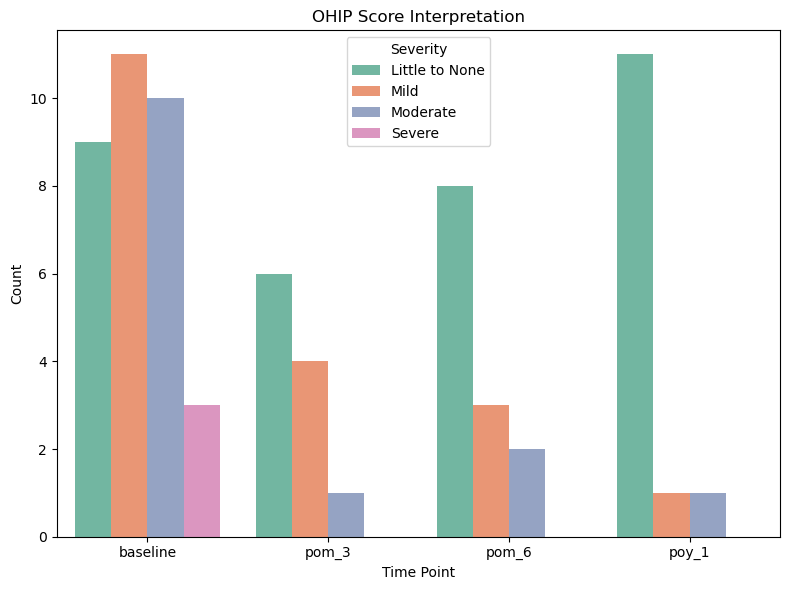

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x='timepoint', hue='ohip_score_interpretation', palette='Set2')

plt.title('OHIP Score Interpretation')
plt.xlabel('Time Point')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

#the general overview of the scroes and their stratification was displayed using a historgram. 

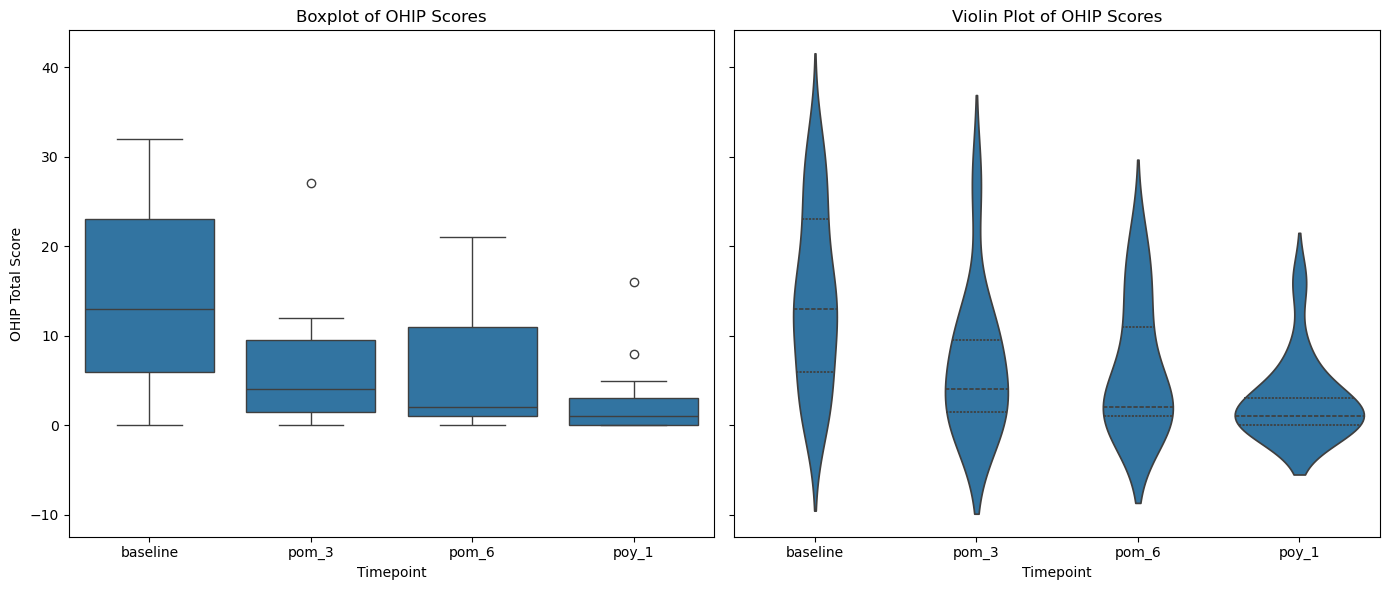

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # 1 row, 2 cols, same y-axis scale

# Boxplot on the left
sns.boxplot(data=df_total, x='timepoint', y='total', order=order, ax=axes[0])
axes[0].set_title('Boxplot of OHIP Scores')
axes[0].set_xlabel('Timepoint')
axes[0].set_ylabel('OHIP Total Score')

# Violin plot on the right
sns.violinplot(data=df_total, x='timepoint', y='total', order=order, inner='quartile', ax=axes[1])
axes[1].set_title('Violin Plot of OHIP Scores')
axes[1].set_xlabel('Timepoint')
axes[1].set_ylabel('')  # No need to repeat ylabel

plt.tight_layout()
plt.show()

Prior to surgical intervention, the distribution of oral health impact was broader. While most patients reported mild severity, the number reporting moderate severity was similar to those in the "little to none" category. A small group also reported a severe impact on their oral health.

By postoperative month 3, no patients reported severe impact, though some continued to experience mild or moderate levels. As recovery progressed, the reported impact continued to decline. By postoperative year 1, only two patients reported mild or moderate impact, with the majority indicating little to none.

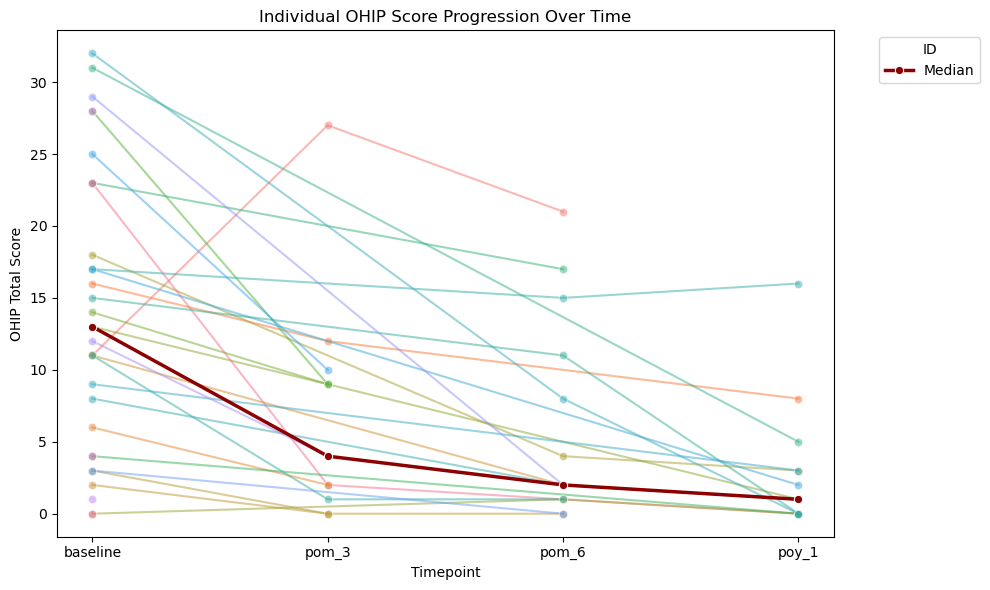

In [15]:
plt.figure(figsize=(10,6))

median_scores = df_total.groupby('timepoint', observed=True)['total'].median().reset_index()

# Individual trajectories
sns.lineplot(data=df_total, x='timepoint', y='total', hue='participant_id',
             marker='o', alpha=0.5, legend=False)

# Median line
sns.lineplot(data=median_scores, x='timepoint', y='total',
             color='darkred', linewidth=2.5, marker='o', label='Median')

plt.xlabel('Timepoint')
plt.ylabel('OHIP Total Score')
plt.title('Individual OHIP Score Progression Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='ID')
plt.tight_layout()
plt.show()

The graph above illustrates individual OHIP scores from baseline through postoperative year 1. Although some data points are missing, the overall trend shows a decrease in scores, reflecting an improvement in patients’ oral health–related quality of life. When focusing on the median scores at each timepoint, this pattern of improvement following surgery becomes even clearer.

To further explore these changes, the next step involves a detailed comparison between each time point to assess the magnitude and significance of score differences.

---

## Statistical Analysis

### Wilcoxon Signed-Rank Test: Baseline vs Postoperative Scores

Because the sample size is small (less than 30) and normality assumptions could not be reliably confirmed, we used the **Wilcoxon signed-rank test**, a non-parametric alternative to the paired t-test.

This test assesses whether median OHIP scores at post-op timepoints differ significantly from baseline, allowing us to evaluate patient recovery across time.

In [16]:
from scipy.stats import wilcoxon

# Define all timepoint pairs you want to compare
comparisons = [
    ('baseline', 'pom_3'),
    ('pom_3', 'pom_6'),
    ('pom_6', 'poy_1'),
    ('baseline', 'pom_6'),     # added
    ('baseline', 'poy_1')      # added
]

results = []

for tp1, tp2 in comparisons:
    # Filter and pivot data
    paired_data = df_total[df_total['timepoint'].isin([tp1, tp2])]
    pivot = paired_data.pivot(index='participant_id', columns='timepoint', values='total')
    pivot = pivot.dropna(subset=[tp1, tp2])

    # Run Wilcoxon signed-rank test
    if len(pivot) >= 1:
        stat_test, p_val = wilcoxon(pivot[tp1], pivot[tp2])
    else:
        stat_test, p_val = None, None  # Handle empty pairs safely

    # Store result
    results.append({
        'Comparison': f'{tp1} vs {tp2}',
        'Test Used': 'Wilcoxon signed-rank',
        'Test Statistic': stat_test,
        'Test p-value': p_val,
        'Sample Size': len(pivot)
    })

# Convert to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


       Comparison            Test Used  Test Statistic  Test p-value  Sample Size
baseline vs pom_3 Wilcoxon signed-rank             9.0      0.032227           11
   pom_3 vs pom_6 Wilcoxon signed-rank             0.0      0.317311            3
   pom_6 vs poy_1 Wilcoxon signed-rank             2.5      0.156250            6
baseline vs pom_6 Wilcoxon signed-rank            10.5      0.013428           13
baseline vs poy_1 Wilcoxon signed-rank             0.0      0.002183           13


C:\Users\rschu\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


## Results Interpretation

The Wilcoxon signed-rank tests showed statistically significant changes in OHIP scores when comparing postoperative timepoints to baseline, with the most pronounced change observed at POY 1 (lowest p-value). No significant differences were found between the postoperative timepoints themselves. This indicates that the surgical impact on patient-reported outcomes stabilizes early, and the OHIP questionnaire can reliably be administered at any postoperative timepoint (POM 3, POM 6, or POY 1) without loss of meaningful information.

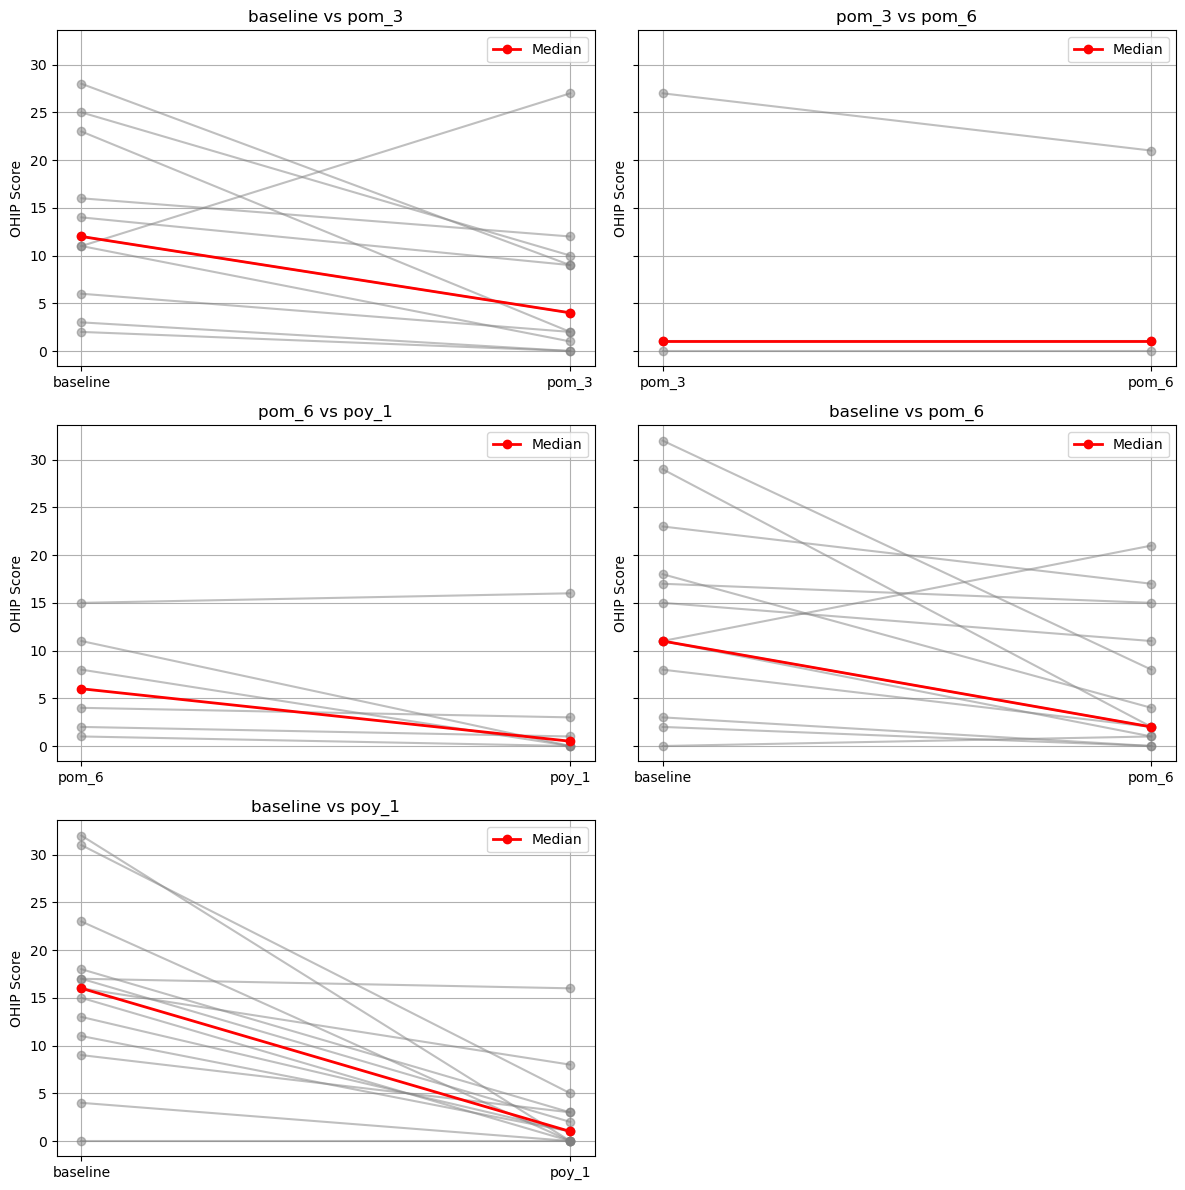

In [20]:
# Define the comparisons you want to plot
comparisons = [
    ('baseline', 'pom_3'),
    ('pom_3', 'pom_6'),
    ('pom_6', 'poy_1'),
    ('baseline', 'pom_6'),
    ('baseline', 'poy_1')
]

n_plots = len(comparisons)
cols = 2
rows = (n_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), sharey=True)
axes = axes.flatten()  # flatten in case of multiple rows

for i, (tp1, tp2) in enumerate(comparisons):
    subset = df_total[df_total['timepoint'].isin([tp1, tp2])]
    pivot = subset.pivot(index='participant_id', columns='timepoint', values='total').dropna()

    ax = axes[i]
    for idx, row in pivot.iterrows():
        ax.plot([tp1, tp2], [row[tp1], row[tp2]], marker='o', color='gray', alpha=0.5)
    
    median_values = pivot[[tp1, tp2]].median()
    ax.plot([tp1, tp2], median_values, marker='o', color='red', linewidth=2, label='Median')
    ax.set_title(f'{tp1} vs {tp2}')
    ax.set_ylabel('OHIP Score')
    ax.grid(True)
    ax.legend()

# If the number of subplots is odd, remove empty subplot
if n_plots < len(axes):
    for j in range(n_plots, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('comparison_graphs.png')
plt.show()


### Interpretation of Change Over Time

Although the plots suggest that the steepest decline in OHIP scores occurs between baseline and POY 1, slope calculations based on the median scores at each timepoint reveal a different pattern.

Specifically, the greatest rate of change (i.e., steepest slope) occurred between baseline and POM 3, indicating that the most rapid improvement in patient-reported outcomes happens early after surgery.

In contrast, while POY 1 showed the largest overall reduction in OHIP scores, this change occurred over a longer period, resulting in a flatter slope. This suggests that most of the functional recovery occurs in the early postoperative phase, with continued but slower improvement through the first year.

In [18]:
# Define timepoints and their numerical values (e.g., months)
timepoint_values = {
    'baseline': 0,
    'pom_3': 3,
    'pom_6': 6,
    'poy_1': 12  # Adjust according to your timeline
}

timepoints = ['baseline', 'pom_3', 'pom_6', 'poy_1']

# Calculate median OHIP for each timepoint
median_scores = df_total.groupby('timepoint')['total'].median().reindex(timepoints)

print(median_scores)


timepoint
baseline    13.0
pom_3        4.0
pom_6        2.0
poy_1        1.0
Name: total, dtype: float64


C:\Users\rschu\AppData\Local\Temp\ipykernel_12796\4132402656.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_scores = df_total.groupby('timepoint')['total'].median().reindex(timepoints)


In [19]:
slopes_median = {}

baseline_time = timepoint_values['baseline']
baseline_median = median_scores['baseline']

for tp in timepoints:
    if tp == 'baseline':
        continue
    time_diff = timepoint_values[tp] - baseline_time
    median_diff = median_scores[tp] - baseline_median
    slope = median_diff / time_diff
    print(f"{tp}: Median baseline={baseline_median}, median {tp}={median_scores[tp]}, time diff={time_diff}, median diff={median_diff}, slope={slope}")
    slopes_median[f'baseline vs {tp}'] = slope

pom_3: Median baseline=13.0, median pom_3=4.0, time diff=3, median diff=-9.0, slope=-3.0
pom_6: Median baseline=13.0, median pom_6=2.0, time diff=6, median diff=-11.0, slope=-1.8333333333333333
poy_1: Median baseline=13.0, median poy_1=1.0, time diff=12, median diff=-12.0, slope=-1.0


## Discussion

Based on the current analysis of OHIP questionnaires, orthognathic surgery results in a significant improvement in oral health-related quality of life. The most rapid improvement occurs in the early postoperative phase, particularly by 3 months. However, while scores continue to improve through 6 and 12 months, these later changes are not statistically significant.

Notably, the greatest absolute reduction in OHIP scores is observed at 12 months, but the steepest rate of change occurs between baseline and 3 months. This suggests that while some functional and psychosocial benefits may accrue gradually, the majority of perceptible improvement happens early after surgery.

These findings support the continued collection of postoperative data at 3 months to capture the most meaningful quality-of-life changes. For longer-term monitoring, either 6- or 12-month follow-up questionnaire collection may be sufficient, as they reflect similar levels of improvement.

Limitations of this analysis include a small sample size and incomplete follow-up at some timepoints. Future studies could explore additional timepoints and assess the durability of OHIP improvements beyond one year. In addition, the OHIP scores could be correlated to the surgical procedure performed (LeFort vs BSSO vs bimaxillary).

## Conclusion

This analysis demonstrates that orthognathic surgery leads to significant improvements in oral health-related quality of life, with the most rapid progress occurring by postoperative month 3. Clinicians can leverage this information to set realistic patient expectations regarding recovery timelines. Although further improvements were noted at months 6 and 12, these changes were not statistically significant, suggesting a plateau phase after early recovery. For research purposes, collecting OHIP data at 3 months provides valuable insight into meaningful change, while follow-ups at 6 or 12 months can capture longer-term outcomes.

These findings should be interpreted with caution given the small sample size and limited follow-up data. Future studies with larger, more diverse cohorts and more frequent early timepoints could provide deeper insight into recovery trajectories. Nonetheless, the current results support early quality-of-life improvements as a reliable outcome of surgical intervention.